In [3]:
import pandas as pd

DATA_PATH = "/kaggle/input/spacedata22/2024_S1_cdm_ccsds_AE.csv"

df = pd.read_csv(DATA_PATH)

print("Loaded file:", DATA_PATH)
print("Shape (rows, cols):", df.shape)
print("\nColumns:")
for i, c in enumerate(df.columns.tolist()):
    print(f"{i+1:03d}. {c}")


Loaded file: /kaggle/input/spacedata22/2024_S1_cdm_ccsds_AE.csv
Shape (rows, cols): (185511, 117)

Columns:
001. conjunction_id
002. comment_header
003. creation_date
004. originator
005. message_id
006. event_id
007. comment_relative_metadata_data
008. tca
009. miss_distance
010. relative_speed
011. relative_position_r
012. relative_position_t
013. relative_position_n
014. relative_velocity_r
015. relative_velocity_t
016. relative_velocity_n
017. start_screen_period
018. stop_screen_period
019. screen_volume_radius
020. collision_probability
021. collision_probability_method
022. collision_max_probability
023. collision_max_pc_method
024. previous_message_id
025. comment_object1_metadata
026. object1_object_designator
027. object1_catalog_name
028. object1_object_name
029. object1_international_designator
030. object1_object_type
031. object1_ephemeris_name
032. object1_covariance_method
033. object1_maneuverable
034. object1_orbit_center
035. object1_ref_frame
036. object1_cov_type
0

In [4]:
import pandas as pd
import numpy as np


display(df.head(8))

# dtypes + non-null counts + unique count
dtypes = df.dtypes.apply(lambda x: x.name).to_frame(name='dtype')
dtypes['non_null_count'] = df.count().values
dtypes['n_unique'] = df.nunique().values

display(dtypes)

# show top columns with highest missing values
missing = df.isnull().sum().sort_values(ascending=False)
display(missing.head(25))


,conjunction_id,comment_header,creation_date,originator,message_id,event_id,comment_relative_metadata_data,tca,miss_distance,relative_speed,...,object2_ctdot_t,object2_ctdot_n,object2_ctdot_rdot,object2_ctdot_tdot,object2_cndot_r,object2_cndot_t,object2_cndot_n,object2_cndot_rdot,object2_cndot_tdot,object2_cndot_ndot
0,4708712,COMMENT,45:37.2,SMS,sms9_4708712,3059662,COMMENT,02:05.5,360.998008,4152.541202,...,0,0,0,0,0,0,0,0,0,0
1,4796676,COMMENT,07:39.0,SMS,sms9_4796676,3108026,COMMENT,02:42.5,230.331161,6774.705183,...,0,0,0,0,0,0,0,0,0,0
2,4714477,COMMENT,25:34.0,SMS,sms9_4714477,3062731,COMMENT,03:50.8,203.939751,8049.963408,...,0,0,0,0,0,0,0,0,0,0
3,4411173,COMMENT,09:39.8,SMS,sms9_4411173,2896647,COMMENT,06:15.3,391.652906,9631.056058,...,0,0,0,0,0,0,0,0,0,0
4,4654350,COMMENT,52:44.5,SMS,sms9_4654350,3030325,COMMENT,06:16.3,394.310175,1069.289496,...,0,0,0,0,0,0,0,0,0,0
5,4778044,COMMENT,07:58.8,SMS,sms9_4778044,2966504,COMMENT,07:26.1,237.292201,15088.956320,...,0,0,0,0,0,0,0,0,0,0
6,4682622,COMMENT,56:03.0,SMS,sms9_4682622,3045651,COMMENT,08:32.1,446.721133,4664.316417,...,0,0,0,0,0,0,0,0,0,0
7,4449423,COMMENT,50:15.5,SMS,sms9_4449423,2917220,COMMENT,09:04.7,179.253519,4640.142677,...,0,0,0,0,0,0,0,0,0,0


,dtype,non_null_count,n_unique
conjunction_id,int64,185511,185511
comment_header,object,185511,1
creation_date,object,185511,35789
originator,object,185511,1
message_id,object,185511,185511
...,...,...,...
object2_cndot_t,int64,185511,1
object2_cndot_n,int64,185511,1
object2_cndot_rdot,int64,185511,1
object2_cndot_tdot,int64,185511,1


previous_message_id                           185511
object2_operator_organization                 185511
object2_maneuverable                          149396
object1_maneuverable                          149371
conjunction_id                                     0
comment_object2_state_vector                       0
object2_area_pc_max                                0
object2_area_pc                                    0
comment_object2_data_additional_parameters         0
comment_object2_od_parameters                      0
object2_cov_type                                   0
object2_ref_frame                                  0
object2_orbit_center                               0
object2_covariance_method                          0
object2_ephemeris_name                             0
object2_object_type                                0
object2_international_designator                   0
object2_object_name                                0
object2_catalog_name                          

In [5]:
# select only numeric columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])

print("Numeric columns:", numeric_df.shape)

# check variance to drop columns that are constant
from sklearn.feature_selection import VarianceThreshold

selector = VarianceThreshold(threshold=0.0)
selector.fit(numeric_df)

variances = selector.variances_


var_table = pd.DataFrame({
    'column': numeric_df.columns,
    'variance': variances
})


var_table = var_table.sort_values(by='variance')
display(var_table)


Numeric columns: (185511, 77)


/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_variance_threshold.py:111: RuntimeWarning: Degrees of freedom <= 0 for slice.
  self.variances_ = np.nanvar(X, axis=0)
/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_variance_threshold.py:119: RuntimeWarning: All-NaN slice encountered
  self.variances_ = np.nanmin(compare_arr, axis=0)
/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_variance_threshold.py:121: RuntimeWarning: invalid value encountered in less_equal
  if np.all(~np.isfinite(self.variances_) | (self.variances_ <= self.threshold)):
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/pytho

,column,variance
38,object1_ctdot_tdot,0.000000e+00
34,object1_ctdot_r,0.000000e+00
35,object1_ctdot_t,0.000000e+00
36,object1_ctdot_n,0.000000e+00
37,object1_ctdot_rdot,0.000000e+00
...,...,...
56,object2_cr_r,2.054471e+10
26,object1_ct_t,5.304520e+11
58,object2_ct_t,7.889650e+11
13,previous_message_id,NaN


In [6]:
import pandas as pd

DATA_PATH = "/kaggle/input/spacedata22/2024_S1_cdm_ccsds_AE.csv"  
df = pd.read_csv(DATA_PATH)

selected_features = [
    'miss_distance',
    'relative_speed',
    'relative_position_r',
    'relative_position_t',
    'relative_position_n',
    'relative_velocity_r',
    'relative_velocity_t',
    'relative_velocity_n',
    'collision_probability',
    'collision_max_probability'
]

existing = [f for f in selected_features if f in df.columns]
missing = [f for f in selected_features if f not in df.columns]

print("Existing selected features:", existing)
print("Missing selected features:", missing)
print("\nFirst 8 rows of the selected features:\n")
print(df[existing].head(8).to_string(index=False))

print("\nDescriptive statistics (selected features):\n")
print(df[existing].describe().T.to_string())

print("\nNaN counts per selected feature:\n")
print(df[existing].isnull().sum().to_string())


Existing selected features: ['miss_distance', 'relative_speed', 'relative_position_r', 'relative_position_t', 'relative_position_n', 'relative_velocity_r', 'relative_velocity_t', 'relative_velocity_n', 'collision_probability', 'collision_max_probability']
Missing selected features: []

First 8 rows of the selected features:

 miss_distance  relative_speed  relative_position_r  relative_position_t  relative_position_n  relative_velocity_r  relative_velocity_t  relative_velocity_n  collision_probability  collision_max_probability
    360.998008     4152.541202           -99.162148           333.902323           -94.845502             5.580417         -1135.346865         -3994.315309           3.418000e-06                   0.000133
    230.331161     6774.705183            53.979268          -196.757413          -106.888740          -285.447083         -3278.221296          5921.859118           2.093830e-05                   0.000400
    203.939751     8049.963408          -131.907523 

In [7]:
import numpy as np


# 1) compute magnitudes if components exist
pos_cols = ['relative_position_r', 'relative_position_t', 'relative_position_n']
vel_cols = ['relative_velocity_r', 'relative_velocity_t', 'relative_velocity_n']

if all(c in df.columns for c in pos_cols):
    df['rel_pos_mag'] = np.sqrt(df[pos_cols[0]]**2 + df[pos_cols[1]]**2 + df[pos_cols[2]]**2)
    print("rel_pos_mag computed.")
else:
    print("One or more position components missing; rel_pos_mag not computed.")

if all(c in df.columns for c in vel_cols):
    df['rel_vel_mag'] = np.sqrt(df[vel_cols[0]]**2 + df[vel_cols[1]]**2 + df[vel_cols[2]]**2)
    print("rel_vel_mag computed.")
else:
    print("One or more velocity components missing; rel_vel_mag not computed.")

# 2) log-transform selected skewed features (use log1p to handle zeros)
to_log = []
for col in ['miss_distance', 'relative_speed', 'rel_pos_mag', 'rel_vel_mag']:
    if col in df.columns:
        new_col = col + '_log'
        df[new_col] = np.log1p(df[col].astype(float))
        to_log.append(new_col)

print("\nCreated log columns:", to_log)

# 3) show descriptive stats for new features + original select features
cols_show = ['miss_distance', 'relative_speed', 'rel_pos_mag', 'rel_vel_mag',
             'miss_distance_log', 'relative_speed_log', 'rel_pos_mag_log', 'rel_vel_mag_log',
             'collision_probability', 'collision_max_probability']
cols_show = [c for c in cols_show if c in df.columns]

print("\nDescriptive statistics (selected):")
print(df[cols_show].describe().T.round(6))

# 4) show skewness for these features
print("\nSkewness:")
print(df[cols_show].skew().round(6))

# 5) show top 10 events by collision_max_probability (for manual inspection)
if 'collision_max_probability' in df.columns:
    top_cp = df.nlargest(10, 'collision_max_probability')[['conjunction_id','miss_distance','relative_speed','rel_pos_mag','rel_vel_mag','collision_probability','collision_max_probability']]
    print("\nTop 10 by collision_max_probability:")
    print(top_cp.to_string(index=False))
else:
    print("\nNo collision_max_probability column found.")


rel_pos_mag computed.
rel_vel_mag computed.

Created log columns: ['miss_distance_log', 'relative_speed_log', 'rel_pos_mag_log', 'rel_vel_mag_log']

Descriptive statistics (selected):
                              count         mean          std       min  \
miss_distance              185511.0   315.595593   121.299285  1.582203   
relative_speed             185511.0  7414.595895  4512.002830  0.002862   
rel_pos_mag                185511.0   315.595593   121.299285  1.582203   
rel_vel_mag                185511.0  7414.595895  4512.002830  0.002862   
miss_distance_log          185511.0     5.649621     0.530747  0.948643   
relative_speed_log         185511.0     8.050661     2.562788  0.002858   
rel_pos_mag_log            185511.0     5.649621     0.530747  0.948643   
rel_vel_mag_log            185511.0     8.050661     2.562788  0.002858   
collision_probability      185511.0     0.000022     0.000541  0.000000   
collision_max_probability  185511.0     0.000169     0.003519  0.0

In [8]:
from sklearn.preprocessing import StandardScaler

# Features to use in clustering
cluster_features = [
    'miss_distance_log',
    'relative_speed_log',
    'rel_pos_mag_log',
    'rel_vel_mag_log'
]

X = df[cluster_features].copy()

# Standard scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Clustering features:", cluster_features)
print("Shape after scaling:", X_scaled.shape)

# Show statistics after scaling
import pandas as pd
scaled_df = pd.DataFrame(X_scaled, columns=cluster_features)
print("\nScaled descriptive stats:")
print(scaled_df.describe().T)


Clustering features: ['miss_distance_log', 'relative_speed_log', 'rel_pos_mag_log', 'rel_vel_mag_log']
Shape after scaling: (185511, 4)

Scaled descriptive stats:
                       count          mean       std       min       25%  \
miss_distance_log   185511.0  2.614336e-15  1.000003 -8.857306 -0.438140   
relative_speed_log  185511.0 -1.274688e-16  1.000003 -3.140262  0.153337   
rel_pos_mag_log     185511.0  2.941587e-17  1.000003 -8.857306 -0.438140   
rel_vel_mag_log     185511.0 -8.579630e-17  1.000003 -3.140262  0.153337   

                         50%       75%       max  
miss_distance_log   0.285155  0.737870  1.068277  
relative_speed_log  0.311258  0.470583  0.656346  
rel_pos_mag_log     0.285155  0.737870  1.068277  
rel_vel_mag_log     0.311258  0.470583  0.656346  


k=2, silhouette=0.6988
k=3, silhouette=0.6194
k=4, silhouette=0.5491
k=5, silhouette=0.5397
k=6, silhouette=0.4929
k=7, silhouette=0.4573
k=8, silhouette=0.4196
k=9, silhouette=0.4175


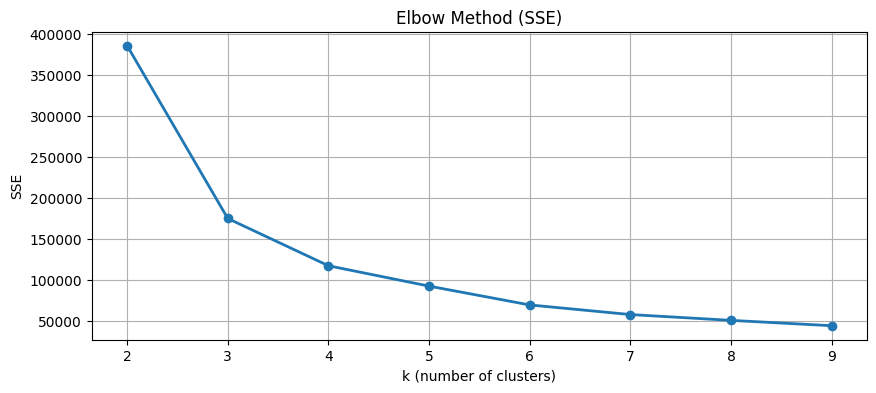

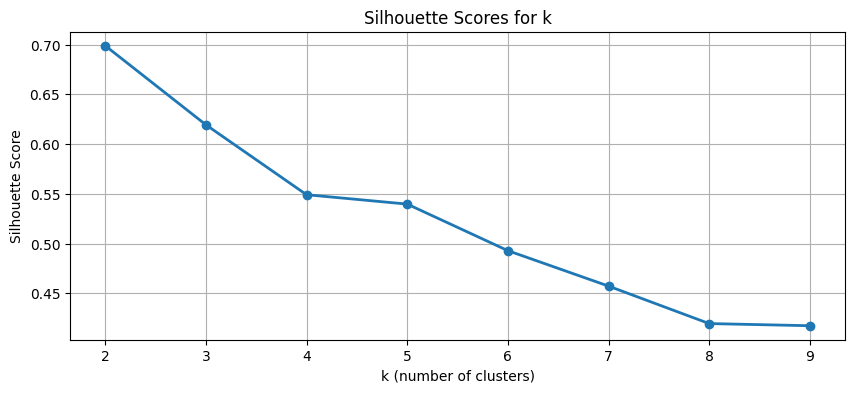

In [9]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

sse = []
sil_scores = []
K_range = range(2, 10)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)
    
    sse.append(kmeans.inertia_)
    sil = silhouette_score(X_scaled, labels)
    sil_scores.append(sil)
    print(f"k={k}, silhouette={sil:.4f}")


plt.figure(figsize=(10,4))
plt.plot(K_range, sse, 'o-', linewidth=2)
plt.title("Elbow Method (SSE)")
plt.xlabel("k (number of clusters)")
plt.ylabel("SSE")
plt.grid(True)
plt.show()


plt.figure(figsize=(10,4))
plt.plot(K_range, sil_scores, 'o-', linewidth=2)
plt.title("Silhouette Scores for k")
plt.xlabel("k (number of clusters)")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()


In [10]:
from sklearn.cluster import KMeans

# Fit final model with k = 2
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
labels = kmeans.fit_predict(X_scaled)

df['cluster'] = labels  # attach result to original data

# Basic cluster statistics
print(df['cluster'].value_counts())

cluster_stats = df.groupby('cluster')[[
    'miss_distance',
    'relative_speed',
    'rel_pos_mag',
    'rel_vel_mag',
    'collision_probability',
    'collision_max_probability'
]].mean()

print("\nCluster mean values:\n")
print(cluster_stats)

cluster_stats_desc = df.groupby('cluster')[[
    'miss_distance',
    'relative_speed',
    'rel_pos_mag',
    'rel_vel_mag',
    'collision_probability',
    'collision_max_probability'
]].describe()

print("\nCluster descriptive stats:\n")
print(cluster_stats_desc)


cluster
0    167438
1     18073
Name: count, dtype: int64

Cluster mean values:

         miss_distance  relative_speed  rel_pos_mag  rel_vel_mag  \
cluster                                                            
0           320.530872     8214.775122   320.530872  8214.775122   
1           269.872514        1.304836   269.872514     1.304836   

         collision_probability  collision_max_probability  
cluster                                                    
0                     0.000023                   0.000176  
1                     0.000015                   0.000111  

Cluster descriptive stats:

        miss_distance                                                \
                count        mean         std       min         25%   
cluster                                                               
0            167438.0  320.530872  120.317228  1.582203  231.813797   
1             18073.0  269.872514  120.815376  1.799856  175.545341   

                     

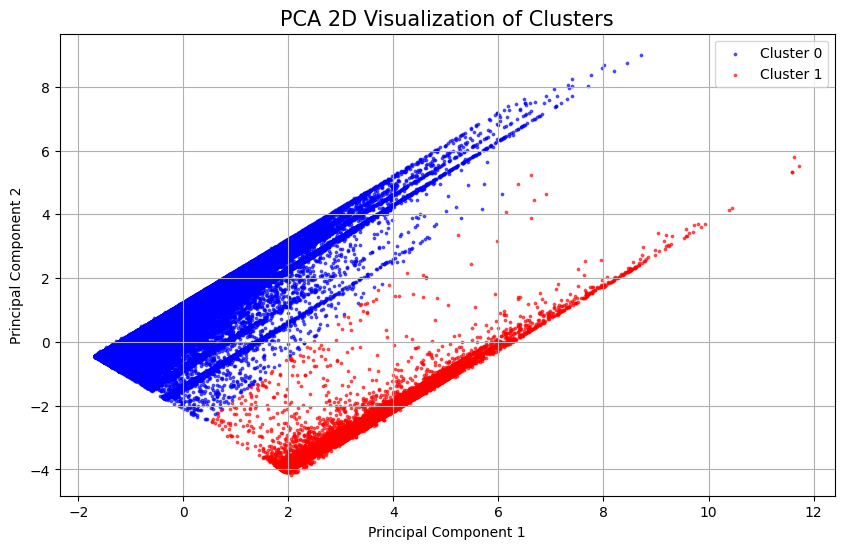

Explained variance ratio: [0.55846619 0.44153381]


In [11]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Apply PCA to the scaled features
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Add PCA components to the dataframe
df['pca1'] = X_pca[:, 0]
df['pca2'] = X_pca[:, 1]

# Colors for clusters
colors = {0: 'blue', 1: 'red'}

plt.figure(figsize=(10, 6))
for cluster_id in df['cluster'].unique():
    subset = df[df['cluster'] == cluster_id]
    plt.scatter(subset['pca1'], subset['pca2'],
                s=3,
                c=colors[cluster_id],
                label=f"Cluster {cluster_id}",
                alpha=0.6)

plt.title("PCA 2D Visualization of Clusters", fontsize=15)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.grid(True)
plt.show()

# Show explained variance
print("Explained variance ratio:", pca.explained_variance_ratio_)


In [12]:
print("X_scaled shape:", X_scaled.shape)
print(X_scaled[:5])


X_scaled shape: (185511, 4)
[[ 0.45599619  0.10966838  0.45599619  0.10966838]
 [-0.3877005   0.30062588 -0.3877005   0.30062588]
 [-0.61593453  0.36791541 -0.61593453  0.36791541]
 [ 0.60915299  0.43788041  0.60915298  0.43788041]
 [ 0.62186091 -0.41945693  0.62186091 -0.41945693]]


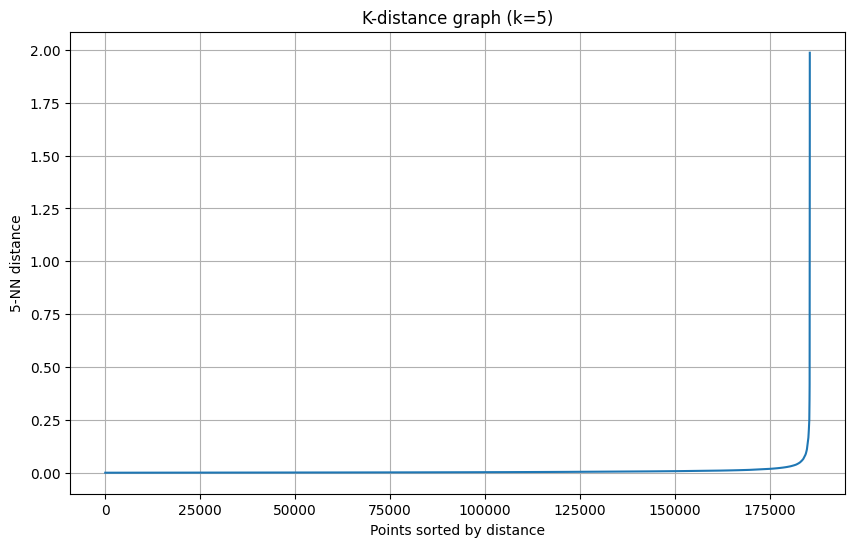

In [13]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
import matplotlib.pyplot as plt

# Step: compute k-distance
k = 5
nn = NearestNeighbors(n_neighbors=k)
nn.fit(X_scaled)

distances, indices = nn.kneighbors(X_scaled)

# k-distance is the distance to the 5th nearest neighbor
k_distances = np.sort(distances[:, -1])

plt.figure(figsize=(10,6))
plt.plot(k_distances)
plt.xlabel("Points sorted by distance")
plt.ylabel(f"{k}-NN distance")
plt.title("K-distance graph (k=5)")
plt.grid(True)
plt.show()


In [14]:
from sklearn.cluster import DBSCAN

eps_value = 0.15
min_samples_value = 5   # same as k in k-distance

db = DBSCAN(eps=eps_value, min_samples=min_samples_value)
labels = db.fit_predict(X_scaled)

unique, counts = np.unique(labels, return_counts=True)
dict(zip(unique, counts))


{-1: 314,
 0: 167269,
 1: 17769,
 2: 6,
 3: 6,
 4: 7,
 5: 10,
 6: 7,
 7: 17,
 8: 6,
 9: 27,
 10: 8,
 11: 5,
 12: 9,
 13: 5,
 14: 5,
 15: 8,
 16: 9,
 17: 6,
 18: 8,
 19: 5,
 20: 5}

Cluster counts: {-1: 165, 0: 167439, 1: 17819, 2: 9, 3: 6, 4: 17, 5: 5, 6: 17, 7: 6, 8: 8, 9: 5, 10: 5, 11: 5, 12: 5}


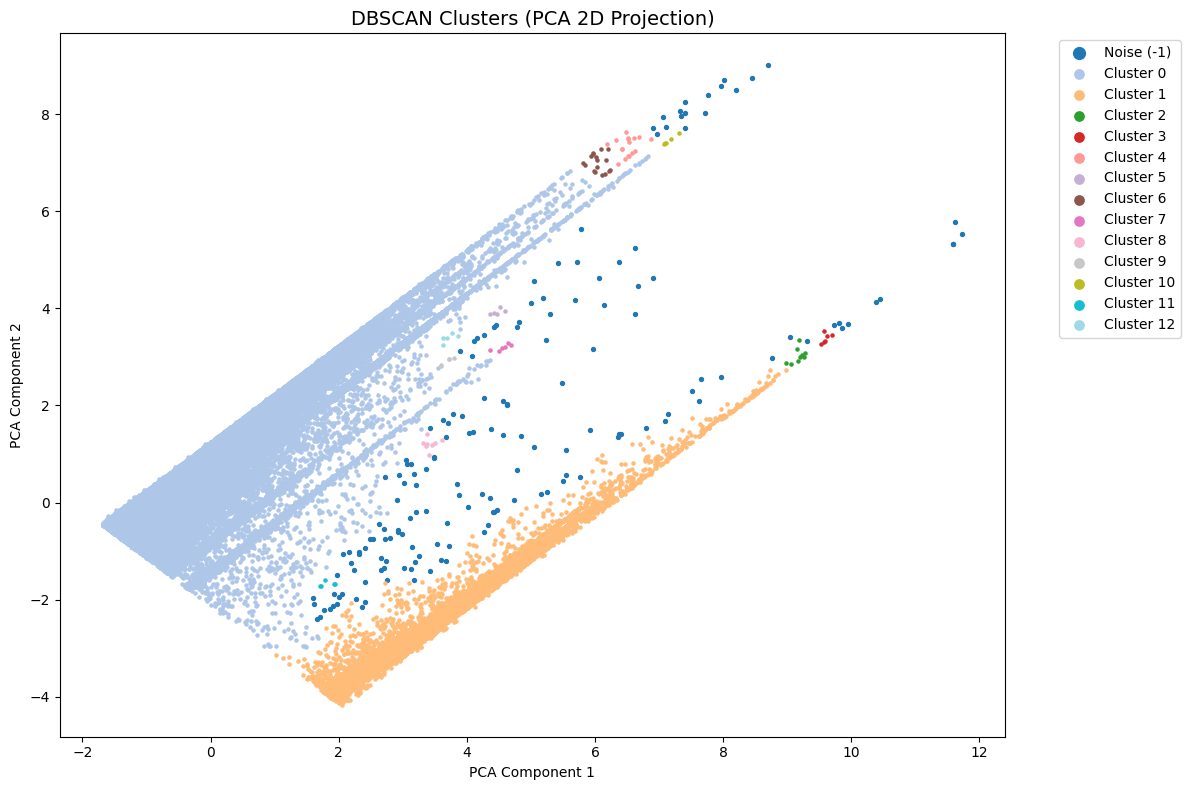

Explained variance ratio: [0.55846619 0.44153381]


In [16]:
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# --- Run DBSCAN ---
dbscan = DBSCAN(eps=0.2, min_samples=5)
labels = dbscan.fit_predict(X_scaled)

print("Cluster counts:", dict(zip(*np.unique(labels, return_counts=True))))

# --- PCA 
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

unique_labels = np.unique(labels)
colors = plt.cm.tab20(np.linspace(0, 1, len(unique_labels)))

plt.figure(figsize=(12, 8))

for label, color in zip(unique_labels, colors):
    mask = labels == label
    if label == -1:
        plt.scatter(X_pca[mask, 0], X_pca[mask, 1],
                    c=[color], s=8, label="Noise (-1)")
    else:
        plt.scatter(X_pca[mask, 0], X_pca[mask, 1],
                    c=[color], s=5, label=f"Cluster {label}")

plt.title("DBSCAN Clusters (PCA 2D Projection)", fontsize=14)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(markerscale=3, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

print("Explained variance ratio:", pca.explained_variance_ratio_)


In [17]:
import pandas as pd
import numpy as np
import joblib


# - DBSCAN labels either in df['dbscan_label'] or variable 'labels' from previous run
# - Isolation Forest flags maybe in df['iso_anomaly'] (1 normal, -1 anomaly)

# 1) ensure kmeans column exists
if 'cluster' not in df.columns:
    try:
        # if labels variable exists in the session (from previous KMeans)
        df['cluster'] = labels
    except NameError:
        # fallback: compute simple kmeans with k=2 on X_scaled
        from sklearn.cluster import KMeans
        kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
        df['cluster'] = kmeans.fit_predict(X_scaled)

# 2) ensure dbscan_label exists
if 'dbscan_label' not in df.columns:
    try:
        df['dbscan_label'] = labels  # labels from latest DBSCAN if present
    except NameError:
        try:
            df['dbscan_label'] = db.labels_
        except NameError:
            df['dbscan_label'] = np.nan

# 3) ensure iso_anomaly exists (optional)
if 'iso_anomaly' not in df.columns:
    # try to see if isolation forest result variable exists
    if 'iso_labels' in globals():
        df['iso_anomaly'] = iso_labels
    else:
        # leave NaN if not available
        df['iso_anomaly'] = df.get('iso_anomaly', np.nan)

# 4) make sure derived features exist (rel_pos_mag, rel_vel_mag, log columns)
derived = ['rel_pos_mag','rel_vel_mag','miss_distance_log','relative_speed_log','rel_pos_mag_log','rel_vel_mag_log']
for col in derived:
    if col not in df.columns:
        # try to compute if possible
        try:
            if col == 'rel_pos_mag':
                df['rel_pos_mag'] = np.sqrt(df['relative_position_r']**2 + df['relative_position_t']**2 + df['relative_position_n']**2)
            elif col == 'rel_vel_mag':
                df['rel_vel_mag'] = np.sqrt(df['relative_velocity_r']**2 + df['relative_velocity_t']**2 + df['relative_velocity_n']**2)
            else:
                base = col.replace('_log','')
                if base in df.columns:
                    df[col] = np.log1p(df[base].astype(float))
        except Exception:
            df[col] = np.nan

# 5) choose columns for export
core_cols = [
    'conjunction_id','creation_date','tca',
    'miss_distance','relative_speed',
    'relative_position_r','relative_position_t','relative_position_n',
    'relative_velocity_r','relative_velocity_t','relative_velocity_n',
    'rel_pos_mag','rel_vel_mag',
    'miss_distance_log','relative_speed_log','rel_pos_mag_log','rel_vel_mag_log',
    'collision_probability','collision_max_probability',
    'cluster','dbscan_label','iso_anomaly'
]


meta = [c for c in ['object1_object_designator','object2_object_designator',
                    'object1_object_type','object2_object_type',
                    'object1_maneuverable','object2_maneuverable'] if c in df.columns]

out_cols = [c for c in core_cols if c in df.columns] + meta

events_summary = df[out_cols].copy()

# 6) add simple anomaly flag combining dbscan or iso
events_summary['anomaly_flag'] = ((events_summary.get('dbscan_label') == -1) | (events_summary.get('iso_anomaly') == -1))
events_summary['anomaly_flag'] = events_summary['anomaly_flag'].fillna(False)


events_summary.to_csv("events_summary_for_RL.csv", index=False)


print("Saved events_summary_for_RL.csv with shape:", events_summary.shape)
print("Anomaly counts (anomaly_flag):")
print(events_summary['anomaly_flag'].value_counts())

print("\nFirst 10 rows of events_summary:")
print(events_summary.head(10).to_string(index=False))


Saved events_summary_for_RL.csv with shape: (185511, 29)
Anomaly counts (anomaly_flag):
anomaly_flag
False    185346
True        165
Name: count, dtype: int64

First 10 rows of events_summary:
 conjunction_id creation_date     tca  miss_distance  relative_speed  relative_position_r  relative_position_t  relative_position_n  relative_velocity_r  relative_velocity_t  relative_velocity_n  rel_pos_mag  rel_vel_mag  miss_distance_log  relative_speed_log  rel_pos_mag_log  rel_vel_mag_log  collision_probability  collision_max_probability  cluster  dbscan_label  iso_anomaly  object1_object_designator  object2_object_designator object1_object_type object2_object_type object1_maneuverable object2_maneuverable  anomaly_flag
        4708712       45:37.2 02:05.5     360.998008     4152.541202           -99.162148           333.902323           -94.845502             5.580417         -1135.346865         -3994.315309   360.998008  4152.541202           5.891639            8.331717         5.891639 

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


In [19]:
# RL state feature columns
rl_features = [
    'miss_distance',
    'relative_speed',
    'rel_pos_mag',
    'rel_vel_mag',
    'collision_probability',
    'collision_max_probability',
    'cluster',
    'dbscan_label',
    'anomaly_flag'
]


missing = [c for c in rl_features if c not in events_summary.columns]
print("Missing RL features:", missing)

# create RL states dataframe
rl_states = events_summary[rl_features].copy()

# convert boolean to int
rl_states['anomaly_flag'] = rl_states['anomaly_flag'].astype(int)

# convert to numpy
rl_states_np = rl_states.to_numpy()

print("RL state matrix shape:", rl_states_np.shape)
print("First state example:")
print(rl_states_np[0])


Missing RL features: []
RL state matrix shape: (185511, 9)
First state example:
[3.60998008e+02 4.15254120e+03 3.60998008e+02 4.15254120e+03
 3.41800000e-06 1.32870000e-04 0.00000000e+00 0.00000000e+00
 0.00000000e+00]


In [20]:
import numpy as np

np.save("rl_states.npy", rl_states_np)

print("Saved rl_states.npy with shape:", rl_states_np.shape)


Saved rl_states.npy with shape: (185511, 9)


In [21]:
high_risk = events_summary[
    (events_summary['collision_max_probability'] > 0.001) |
    (events_summary['anomaly_flag'] == 1)
]

high_risk.to_csv("high_risk_cases.csv", index=False)

print("High-risk dataset shape:", high_risk.shape)
high_risk.head()


High-risk dataset shape: (4102, 29)


/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pan

,conjunction_id,creation_date,tca,miss_distance,relative_speed,relative_position_r,relative_position_t,relative_position_n,relative_velocity_r,relative_velocity_t,...,cluster,dbscan_label,iso_anomaly,object1_object_designator,object2_object_designator,object1_object_type,object2_object_type,object1_maneuverable,object2_maneuverable,anomaly_flag
27,4817315,11:26.6,29:31.9,35.043184,4664.283756,-33.496707,-9.706805,3.431227,5.873519,-1431.958292,...,0,0,NaN,50173,53265,PAYLOAD,PAYLOAD,NaN,NaN,False
50,4519663,48:52.6,51:21.3,385.367651,13661.121950,-14.041514,165.812017,347.588028,7.015940,-12310.114810,...,0,0,NaN,57044,51802,UNKNOWN,PAYLOAD,NaN,NaN,False
117,4817318,00:28.7,04:54.8,98.399401,4664.241966,-18.636389,92.470859,-28.004775,5.805356,-1431.960560,...,0,0,NaN,50173,53265,PAYLOAD,PAYLOAD,NaN,NaN,False
216,4806102,38:59.9,31:27.1,336.975472,6972.504529,-2.626570,-299.638475,154.150428,3.365602,-3205.652407,...,0,0,NaN,52640,51805,PAYLOAD,PAYLOAD,NaN,NaN,False
385,4864814,07:12.9,31:43.3,218.406328,14634.491880,33.856846,-57.436401,-207.981004,-6.249370,-14133.757070,...,0,0,NaN,48608,56343,DEBRIS,PAYLOAD,NO,NaN,False
